# **Zomato Restaurant Clustering & Sentiment Analysis**  

### **Project Type** - EDA/Unsupervised Learning(Clustering)/ Sentiment Analysis
#### **Contribution**    - Individual
### Santhiya


https://github.com/SanthiyaK/Zomoto-Restaurant-Clustering-and-Sentiment-Analysis.git -

# Project Summary

This project aims to analyze customer reviews and restaurant data from Zomato to extract valuable insights for both customers and the company. The primary objectives include Sentiment Analysis, where Natural Language Processing (NLP) is used to evaluate customer reviews and classify them as positive, negative, or neutral. This helps visualize customer satisfaction levels and identify improvement areas. The second objective is Clustering Restaurants using Unsupervised Machine Learning to group restaurants based on features such as cuisine, cost, location, and ratings. This enables users to discover the best options in their locality and allows the company to identify and improve underperforming areas. The project also involves Cost vs. Benefit Analysis, comparing cuisine quality with pricing to determine value for money across restaurants. Additionally, Reviewer Metadata Analysis helps identify influential reviewers or critics by studying reviewer behavior and profiles.

The project employs techniques such as Unsupervised Learning (Clustering), NLP for sentiment analysis, Exploratory Data Analysis (EDA), and data visualization tools. In the broader business context, Zomato, being one of India’s largest food delivery and restaurant aggregator platforms, benefits from such insights due to the country’s dynamic food culture and rapidly growing number of restaurants. This analysis can uncover trends in customer preferences, monitor market dynamics, and assess individual restaurant performance effectively.

# Problem Statement

Zomato, a leading food delivery and restaurant aggregator in India, hosts a massive amount of customer-generated data, including restaurant details, reviews, ratings, and pricing. However, this valuable information remains underutilized for actionable business insights. There is a need to systematically analyze this data to understand customer sentiment, group restaurants based on key attributes, evaluate value-for-money offerings, and identify influential reviewers.

This project aims to solve the problem of unstructured and scattered restaurant and review data by using Natural Language Processing for sentiment analysis, unsupervised machine learning (clustering) to group similar restaurants, and exploratory data analysis to uncover patterns in pricing, cuisine, and reviewer behavior. The insights gained will help customers make informed dining decisions and assist Zomato in enhancing restaurant recommendations, improving service quality, and optimizing platform engagement.


# Installing and Importing Library

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Python Libraries Overview

---

**NumPy**  
- Used for numerical operations and working with arrays of the same data type.  
- Supports vectorized operations.  
- Foundation of most scientific computing in Python.

---

**Pandas**  
- Designed for data manipulation and analysis.  
- Provides powerful tools like **DataFrame** and **Series** for handling structured data.

---

**Matplotlib**  
- A plotting library used to create static, interactive, and animated visualizations in Python.  
- Great for basic charting and data visualization.

---

**Seaborn**  
- Built on top of Matplotlib.  
- Provides beautiful and informative **statistical graphics** with less code.  
- Comes with better default styling and support for complex visualizations like boxplots, violin plots, heatmaps, etc.


## Data Pipeline Stages

## Step 1: Data Collection

**Goal:** Load your dataset into a Pandas DataFrame for analysis.



In [2]:
try:
    df = pd.read_csv("Zomato Restaurant names and Metadata.csv")
    print(" Zomato data loaded successfully.")
except Exception as e:
    print(" Error loading Zomato data:", e)


 Zomato data loaded successfully.


In [3]:
try:
    review_df = pd.read_csv("Zomato Restaurant reviews.csv")
    print(" Review data loaded successfully.")
except Exception as e:
    print(" Error loading review data:", e)

 Review data loaded successfully.


In [4]:
df.shape

(105, 6)

In [5]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [7]:
review_df.shape

(10000, 7)

In [8]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [9]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


## Step 2: Data Cleaning & Preprocessing

**Goal:**
- Clean both datasets (`zomato.csv` and `zomato_reviews.csv`)
- Make them analysis-ready
- Prepare for EDA, NLP, and Clustering

---

### Why Cleaning is Important?

Raw data often contains:
- Missing values
- Duplicates
- Inconsistent formats (e.g., commas in numbers, mixed cases)
- Unnecessary columns

Cleaning ensures reliable and accurate insights from your analysis.

---

### Common Cleaning Tasks We'll Perform

- Handle missing/null values
- Remove duplicates
- Clean columns like `Price`, `Rating`, `Cost` (remove commas, convert to numeric)
- Normalize text (lowercase, strip whitespace)
- Drop irrelevant or redundant columns
- Prepare text columns for **Sentiment Analysis**
- Format numerical/categorical columns for **Clustering**

In [10]:
## Check and Remove Duplicates on the both Dataset

In [11]:
df.duplicated().any()

np.False_

In [12]:
review_df.duplicated().any()

np.True_

In [13]:
review_df.duplicated().sum()

np.int64(36)

In [14]:
review_df.drop_duplicates(inplace=True)

In [15]:
review_df.duplicated().any()

np.False_

In [16]:
# Check data types and structure

In [17]:
df.dtypes

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object

In [18]:
review_df.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [19]:
#  Drop rows with too many nulls (e.g., more than 3 nulls)


In [20]:
df.dropna(thresh=len(df.columns) - 3, inplace=True)

In [21]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [22]:
# Normalize column names

In [23]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [24]:
df.head()

,name,links,cost,collections,cuisines,timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [25]:
# Clean 'cost' column (remove commas, convert to numeric)

In [26]:
df['cost'] = df['cost'].astype(str).str.replace(',', '', regex=False)
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [27]:
print(df.columns.tolist())


['name', 'links', 'cost', 'collections', 'cuisines', 'timings']


In [28]:
df.describe()

,cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         105 non-null    object
 1   links        105 non-null    object
 2   cost         105 non-null    int64 
 3   collections  51 non-null     object
 4   cuisines     105 non-null    object
 5   timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.1+ KB


In [30]:
#  Fill missing 'cost' with median value

In [31]:
df['cost'] = df['cost'].fillna(df['cost'].median())

In [32]:
# Handle missing values in other important columns

In [33]:
df['collections'] = df['collections'].fillna('Not listed')
df['timings'] = df['timings'].fillna('Unknown')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         105 non-null    object
 1   links        105 non-null    object
 2   cost         105 non-null    int64 
 3   collections  105 non-null    object
 4   cuisines     105 non-null    object
 5   timings      105 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.1+ KB


In [35]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [36]:
#  Normalize column names

In [37]:
review_df.columns = review_df.columns.str.strip().str.lower().str.replace(" ", "_")

In [38]:
# Clean review text (lowercase, strip whitespace)

In [39]:
review_df['review'] = review_df['review'].str.lower().str.strip()

In [40]:
# Convert 'rating' to numeric

In [41]:
review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

In [42]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   restaurant  9964 non-null   object 
 1   reviewer    9962 non-null   object 
 2   review      9955 non-null   object 
 3   rating      9961 non-null   float64
 4   metadata    9962 non-null   object 
 5   time        9962 non-null   object 
 6   pictures    9964 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.8+ KB


# Handling Missing Values

In [43]:
review_df['reviewer'] = review_df['reviewer'].fillna('Anonymous')

In [44]:
#  Fill missing metadata if present

In [45]:
review_df['metadata'] = review_df['metadata'].fillna('No info')

In [46]:
#  Convert 'time' column to datetime, fill missing with a fixed timestamp

In [47]:
review_df['time'] = pd.to_datetime(review_df['time'], errors='coerce')
review_df['time'] = review_df['time'].fillna(pd.Timestamp('2000-01-01'))

In [48]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   restaurant  9964 non-null   object        
 1   reviewer    9964 non-null   object        
 2   review      9955 non-null   object        
 3   rating      9961 non-null   float64       
 4   metadata    9964 non-null   object        
 5   time        9964 non-null   datetime64[ns]
 6   pictures    9964 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.8+ KB


In [49]:
review_df['rating'] = review_df['rating'].fillna(review_df['rating'].median())

In [50]:
review_df['review'] = review_df['review'].fillna('Not listed')

In [51]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   restaurant  9964 non-null   object        
 1   reviewer    9964 non-null   object        
 2   review      9964 non-null   object        
 3   rating      9964 non-null   float64       
 4   metadata    9964 non-null   object        
 5   time        9964 non-null   datetime64[ns]
 6   pictures    9964 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.8+ KB


# **Step 3A: Univariate Analysis**

##  **Goal:**  
**Understand the distribution of individual columns to identify patterns, trends, and potential outliers.**

---

## **Charts to Plot (Univariate):**

### 🔹 **Top Cuisines**

### 🔹 **Restaurant Cost Distribution**

### 🔹 **Ratings Distribution**

### 🔹 **Restaurant Types** *(if available)*

### 🔹 **Timings** *(open/close patterns)*


In [53]:
#  1. Top Cuisines

C:\Users\HP\AppData\Local\Temp\ipykernel_12932\1745902712.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


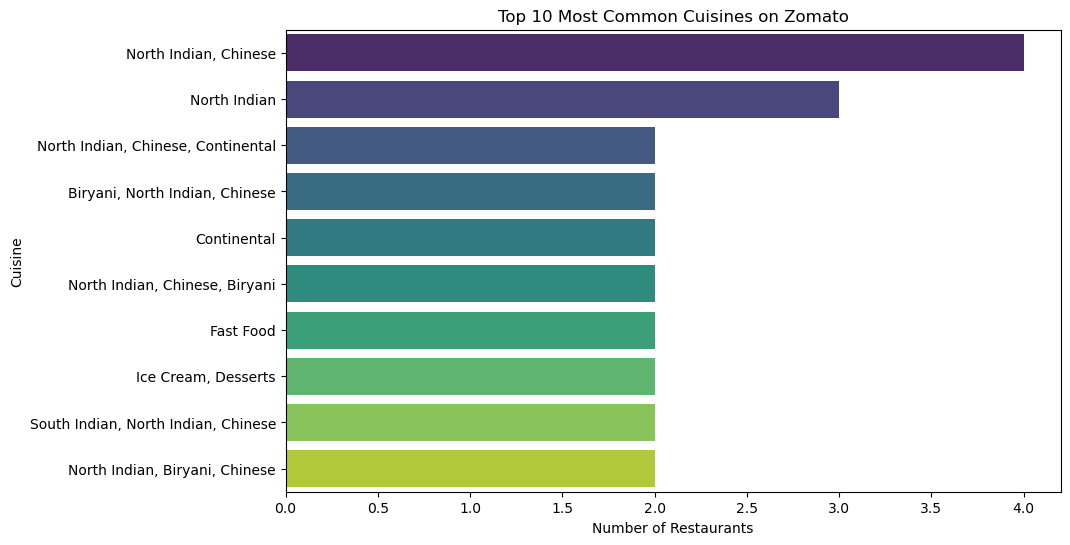

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

top_cuisines = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 10 Most Common Cuisines on Zomato")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


In [55]:
# Insights:
#North Indian, Chinese, and Fast Food dominate the platform, showing a trend toward local and quick options.

In [56]:
# 2. Cost Distribution

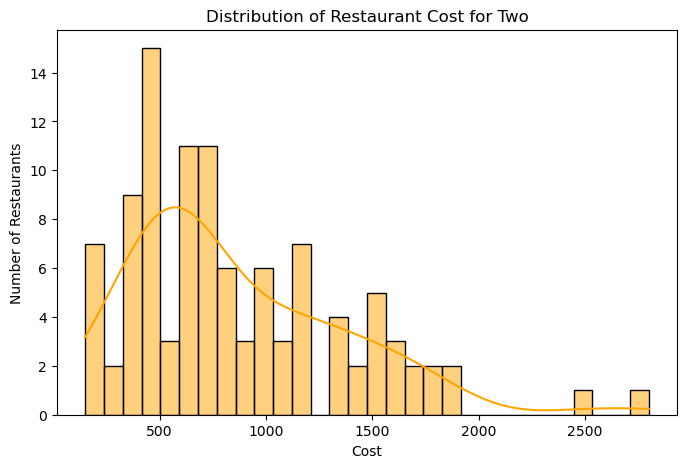

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(df['cost'], kde=True, bins=30, color='orange')
plt.title("Distribution of Restaurant Cost for Two")
plt.xlabel("Cost")
plt.ylabel("Number of Restaurants")
plt.show()


In [58]:
# Insights:
#Most restaurants fall in the ₹200–₹600 range, indicating a budget-friendly market.

In [59]:
# Ratings Distribution

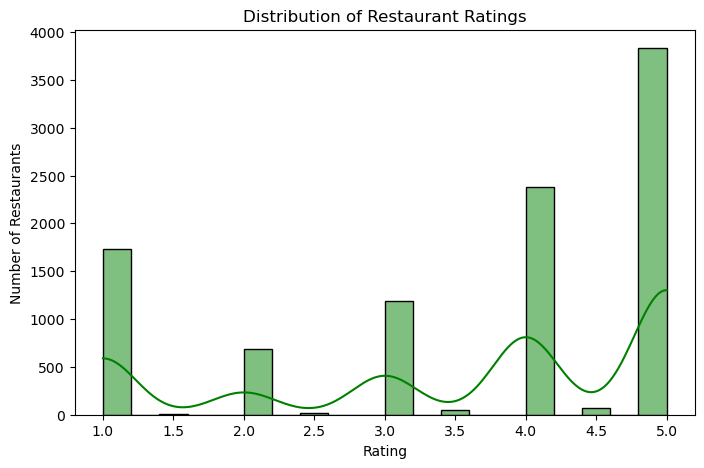

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(review_df['rating'], bins=20, kde=True, color='green')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()


In [61]:
# Insights:
# Majority of restaurants are rated between 3.5 and 4.5.

# Step 3B: Bivariate Analysis

## Goal:
Analyze the relationship between two variables — helps answer business questions like:

- **Do high-cost restaurants get higher ratings?**
- **Does cuisine type affect rating?**
- **Which locations have the best value?**


In [63]:
merged_df = pd.merge(review_df, df, how='inner', left_on='restaurant', right_on='name')


In [108]:
# Outlier handling for 'cost'
Q1 = merged_df['cost'].quantile(0.25)
Q3 = merged_df['cost'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Option 1: Remove outliers
merged_df = merged_df[(merged_df['cost'] >= lower) & (merged_df['cost'] <= upper)]

# Option 2: Cap extreme values (if you prefer keeping data)
# merged_df['cost'] = np.where(merged_df['cost'] > upper, upper, merged_df['cost'])


In [109]:
merged_df

,restaurant,reviewer,review,rating,metadata,time,pictures,name,links,cost,collections,cuisines,timings,cleaned_reviews,Sentiment,cuisines_list
0,Beyond Flavours,Rusha Chakraborty,"the ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",ambienc good food quit good saturday lunch cos...,positive,"[Chinese, Continental, Kebab, European, South ..."
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening. s...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",ambienc good food quit good saturday lunch cos...,positive,"[Chinese, Continental, Kebab, European, South ..."
2,Beyond Flavours,Ashok Shekhawat,a must try.. great food great ambience. thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",ambienc good food quit good saturday lunch cos...,positive,"[Chinese, Continental, Kebab, European, South ..."
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy. only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",ambienc good food quit good saturday lunch cos...,positive,"[Chinese, Continental, Kebab, European, South ..."
4,Beyond Flavours,Dileep,food is good.we ordered kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",ambienc good food quit good saturday lunch cos...,positive,"[Chinese, Continental, Kebab, European, South ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,Chinese Pavilion,Abhishek Mahajan,madhumathi mahajan well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,Not listed,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",ahm serv us polit cooper staffamaz food ambien...,positive,"[Chinese, Seafood]"
9960,Chinese Pavilion,Sharad Agrawal,this place has never disappointed us.. the foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,Not listed,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",ahm serv us polit cooper staffamaz food ambien...,positive,"[Chinese, Seafood]"
9961,Chinese Pavilion,Ramandeep,"bad rating is mainly because of ""chicken bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,Not listed,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",ahm serv us polit cooper staffamaz food ambien...,positive,"[Chinese, Seafood]"
9962,Chinese Pavilion,Nayana Shanbhag,i personally love and prefer chinese food. had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,Not listed,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",ahm serv us polit cooper staffamaz food ambien...,positive,"[Chinese, Seafood]"


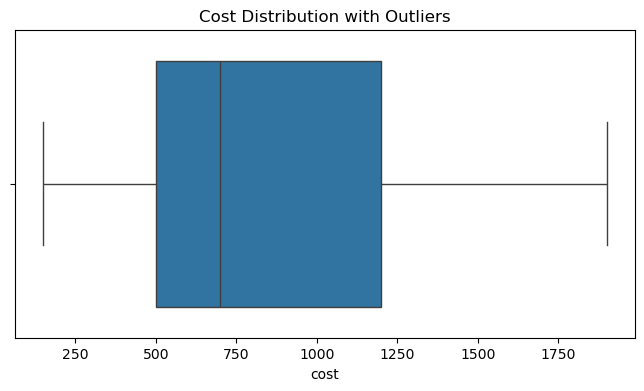

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=merged_df['cost'])
plt.title("Cost Distribution with Outliers")
plt.show()


# Categorical Encoding

In [111]:
df['cuisines']

0       Chinese, Continental, Kebab, European, South I...
1       Chinese, Continental, Kebab, European, South I...
2       Chinese, Continental, Kebab, European, South I...
3       Chinese, Continental, Kebab, European, South I...
4       Chinese, Continental, Kebab, European, South I...
                              ...                        
9959                                     Chinese, Seafood
9960                                     Chinese, Seafood
9961                                     Chinese, Seafood
9962                                     Chinese, Seafood
9963                                     Chinese, Seafood
Name: cuisines, Length: 9964, dtype: object

In [112]:
merged_df['cuisines_list'] = merged_df['cuisines'].str.split(', ')

In [113]:
merged_df['cuisines_list'] 

0       [Chinese, Continental, Kebab, European, South ...
1       [Chinese, Continental, Kebab, European, South ...
2       [Chinese, Continental, Kebab, European, South ...
3       [Chinese, Continental, Kebab, European, South ...
4       [Chinese, Continental, Kebab, European, South ...
                              ...                        
9959                                   [Chinese, Seafood]
9960                                   [Chinese, Seafood]
9961                                   [Chinese, Seafood]
9962                                   [Chinese, Seafood]
9963                                   [Chinese, Seafood]
Name: cuisines_list, Length: 9764, dtype: object

In [114]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(merged_df['cuisines_list']),
                               columns=mlb.classes_,
                               index=merged_df.index)

# Add encoded columns to your original data
df = pd.concat([merged_df, cuisine_encoded], axis=1)


In [115]:
df

,restaurant,reviewer,review,rating,metadata,time,pictures,name,links,cost,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,Rusha Chakraborty,"the ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,...,1,0,0,0,1,0,0,0,0,0
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening. s...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,...,1,0,0,0,1,0,0,0,0,0
2,Beyond Flavours,Ashok Shekhawat,a must try.. great food great ambience. thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,...,1,0,0,0,1,0,0,0,0,0
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy. only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,...,1,0,0,0,1,0,0,0,0,0
4,Beyond Flavours,Dileep,food is good.we ordered kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,Chinese Pavilion,Abhishek Mahajan,madhumathi mahajan well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,...,0,0,0,1,0,0,0,0,0,0
9960,Chinese Pavilion,Sharad Agrawal,this place has never disappointed us.. the foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,...,0,0,0,1,0,0,0,0,0,0
9961,Chinese Pavilion,Ramandeep,"bad rating is mainly because of ""chicken bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,...,0,0,0,1,0,0,0,0,0,0
9962,Chinese Pavilion,Nayana Shanbhag,i personally love and prefer chinese food. had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,...,0,0,0,1,0,0,0,0,0,0


In [64]:
# Cost vs Rating (Numerical vs Numerical)

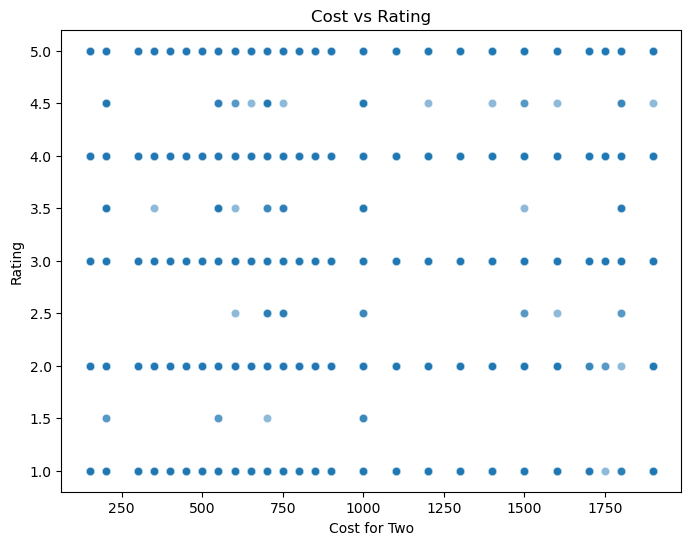

In [116]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='cost', y='rating', alpha=0.5)
plt.title("Cost vs Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()


In [66]:
 # Cuisine vs Average Rating (Categorical vs Numerical)

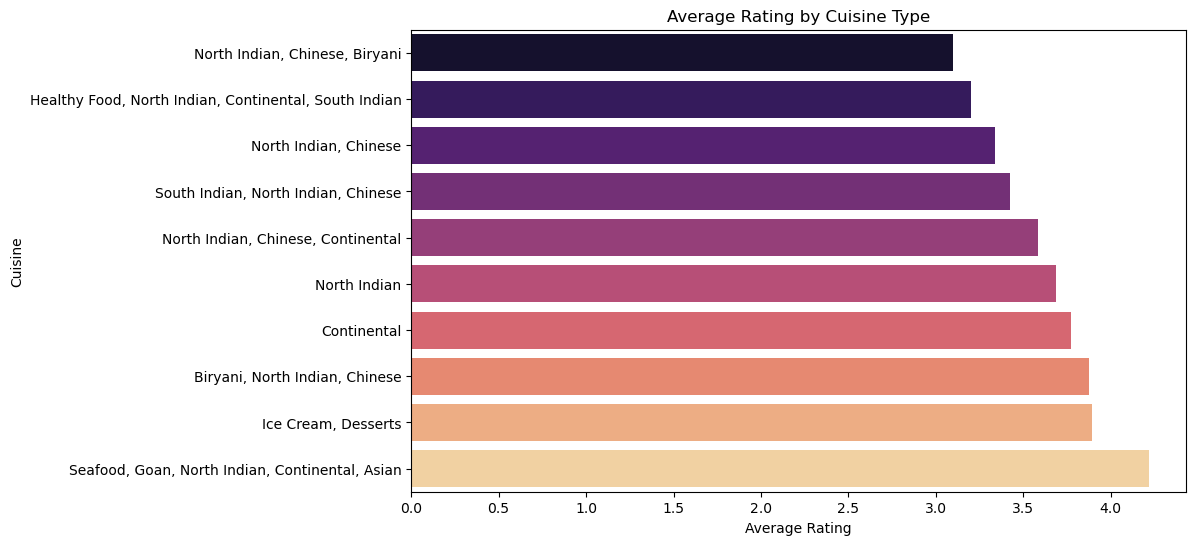

In [117]:
top_cuisines = merged_df['cuisines'].value_counts().head(10).index

cuisine_rating = (
    merged_df[merged_df['cuisines'].isin(top_cuisines)]
    .groupby('cuisines')['rating']
    .mean()
    .sort_values()
)

plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_rating.values, y=cuisine_rating.index, palette="magma")
plt.title("Average Rating by Cuisine Type")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()


#  Step 3C: Multivariate Analysis

##  What is Multivariate Analysis?

Multivariate Analysis means studying **3 or more features at once** to discover deeper patterns, trends, or insights.

---

## Goal:
To understand how **multiple variables together** impact business outcomes like:

- **Ratings**
- **Costs**
- **Customer satisfaction**


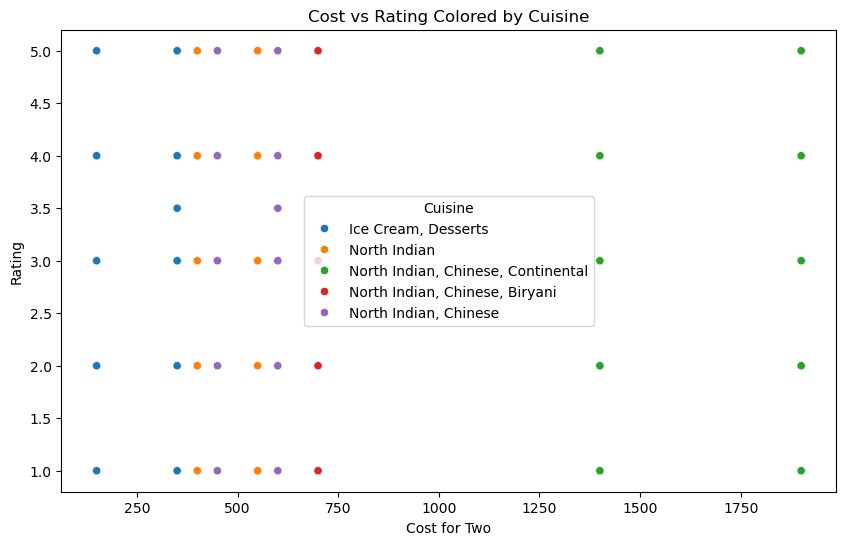

In [118]:
top_cuisines = merged_df['cuisines'].value_counts().head(5).index
subset = merged_df[merged_df['cuisines'].isin(top_cuisines)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='cost', y='rating', hue='cuisines')
plt.title("Cost vs Rating Colored by Cuisine")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.legend(title='Cuisine')
plt.show()


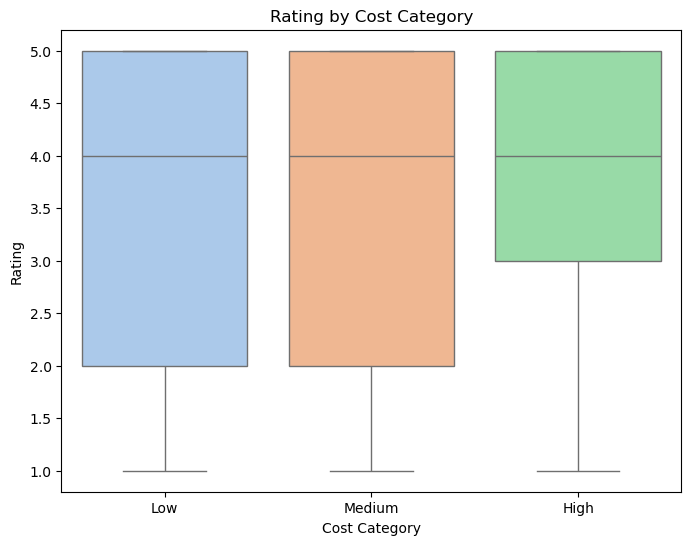

In [119]:

merged_df['cost_category'] = pd.cut(
    merged_df['cost'],
    bins=[0, 300, 700, 2000],
    labels=['Low', 'Medium', 'High']
)
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='cost_category', y='rating', palette='pastel')
plt.title("Rating by Cost Category")
plt.xlabel("Cost Category")
plt.ylabel("Rating")
plt.show()


# Textual Data Preprocessing (for Sentiment Analysis)

## Goal:
This is **mandatory** because you're analyzing **customer reviews (text data)** using **Natural Language Processing (NLP)**.

---

## Why Preprocessing is Needed:
Raw reviews often contain:
- Punctuation
- Stop words (e.g., "is", "the", "and")
- HTML tags
- Mixed casing
- Emojis and symbols

---

## Common Preprocessing Steps:
1. **Lowercasing** – Convert all text to lowercase
2. **Removing punctuation and special characters**
3. **Removing stop words** – Words that don't add meaningful context
4. **Tokenization** – Split sentences into words
5. **Stemming/Lemmatization** – Reduce words to root form
6. **Removing numbers**
7. **Stripping extra whitespace**

---

 This step ensures that your model focuses only on **useful, meaningful words**, improving both performance and accuracy in sentiment classification.


In [71]:
#  Text Cleaning & Preprocessing

In [72]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = str(text).lower()                                 # Lowercase
    text = re.sub(r'\d+', '', text)                          # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()                                      # Remove whitespaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    text = ' '.join([stemmer.stem(word) for word in text.split()])   # Stemming
    return text

df['cleaned_reviews'] = review_df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
df['cleaned_reviews'] 

0      ambienc good food quit good saturday lunch cos...
1      ambienc good pleasant even servic prompt food ...
2      must tri great food great ambienc thnx servic ...
3      soumen da arun great guy behavior sincereti go...
4      food goodw order kodi drumstick basket mutton ...
                             ...                        
100    paradis biryani realli good servic also good s...
101    chiken biryani good spcal chiken cari good tes...
102    good hospitalitygood ambianc good food v good ...
103    good food tasti better music food better quick...
104    goodtasteev paradis make magicchef gladli prep...
Name: cleaned_reviews, Length: 105, dtype: object

In [74]:
# Step 2: Convert Text to Vectors (TF-IDF)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df['cleaned_reviews']).toarray()


In [76]:
# Step 3: Prepare Sentiment Labels

In [77]:
# Example: Convert rating to sentiment
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = review_df['rating'].apply(label_sentiment)


In [78]:
df['Sentiment']

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
100    positive
101    positive
102    positive
103    positive
104    positive
Name: Sentiment, Length: 105, dtype: object

In [79]:
# Encode the target labels:


In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])  # 0 = negative, 1 = neutral, 2 = positive


# Step 4: Train-Test Split

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


In [82]:
 # Train Baseline ML Model – Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.81      1.00      0.89        17

    accuracy                           0.81        21
   macro avg       0.27      0.33      0.30        21
weighted avg       0.66      0.81      0.72        21



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
# Cross-Validation

In [85]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
print("CV F1 Score:", cv_score.mean())


CV F1 Score: 0.33419354838709675


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [86]:
# Hyperparameter Tuning (GridSearchCV)

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Params: {'C': 0.1}


In [88]:
# Step 5: Hypothesis Testing


##  Hypothesis 1:

**Higher-rated restaurants have higher average costs.**

###  1. Null and Alternate Hypotheses:

- **H₀ (Null Hypothesis):**  
  There is **no significant difference** in average cost between high-rated and low-rated restaurants.

- **H₁ (Alternate Hypothesis):**  
  There **is a significant difference** in average cost between high-rated and low-rated restaurants.


In [89]:
from scipy.stats import ttest_ind

# Cleaned and merged dataset: merged_df

# Create groups
high_rated = merged_df[merged_df['rating'] >= 4.0]['cost']
low_rated = merged_df[merged_df['rating'] < 4.0]['cost']

# Remove NaNs
high_rated = high_rated.dropna()
low_rated = low_rated.dropna()

# Perform t-test
t_stat, p_val = ttest_ind(high_rated, low_rated)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis: High-rated and low-rated restaurants have significantly different average costs.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in cost.")


T-statistic: 12.52563505885228
P-value: 1.0039757254009864e-35
Reject Null Hypothesis: High-rated and low-rated restaurants have significantly different average costs.


##  Hypothesis 2:

**Average rating differs significantly among the top 5 cuisines.**

###  1. Null and Alternate Hypotheses:

- **H₀ (Null Hypothesis):**  
  All top 5 cuisines have the **same average rating**.

- **H₁ (Alternate Hypothesis):**  
  **At least one cuisine** has a **different average rating**.

In [91]:

from scipy.stats import f_oneway

top_cuisines = merged_df['cuisines'].value_counts().head(5).index
subset = merged_df[merged_df['cuisines'].isin(top_cuisines)]

# Extract rating lists
groups = [subset[subset['cuisines'] == cuisine]['rating'].dropna() for cuisine in top_cuisines]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H₀: At least one cuisine has a different average rating.")
else:
    print("Fail to Reject H₀: No significant difference in rating among cuisines.")


F-statistic: 9.12243228495859
P-value: 2.8761951343885705e-07
Reject H₀: At least one cuisine has a different average rating.


## Hypothesis 3:

**Restaurants with collections have different average ratings compared to those without collections.**

###  1. Null and Alternate Hypotheses:

- **H₀ (Null Hypothesis):**  
  **Collection status has no effect** on average rating.

- **H₁ (Alternate Hypothesis):**  
  **Collection status affects** average rating.

In [93]:
with_collection = merged_df[merged_df['collections'] != 'Not listed']['rating'].dropna()
without_collection = merged_df[merged_df['collections'] == 'Not listed']['rating'].dropna()

t_stat, p_val = ttest_ind(with_collection, without_collection)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H₀: Collections affect ratings.")
else:
    print("Fail to Reject H₀: No significant effect of collections on rating.")


T-statistic: 11.053185125222411
P-value: 3.0864241752050272e-28
Reject H₀: Collections affect ratings.


#  Step 6: Clustering

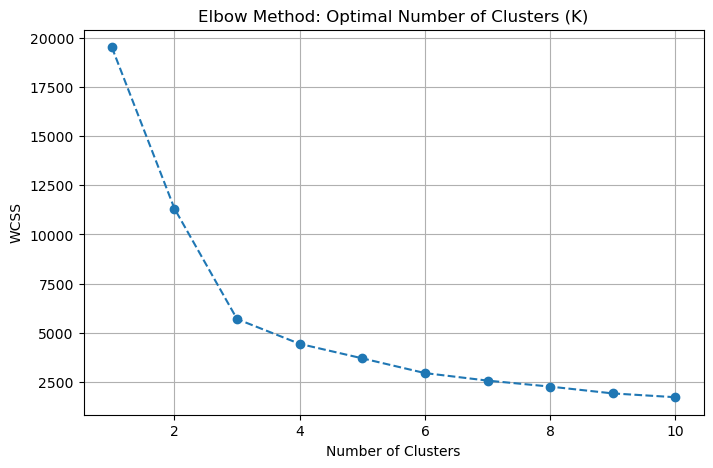

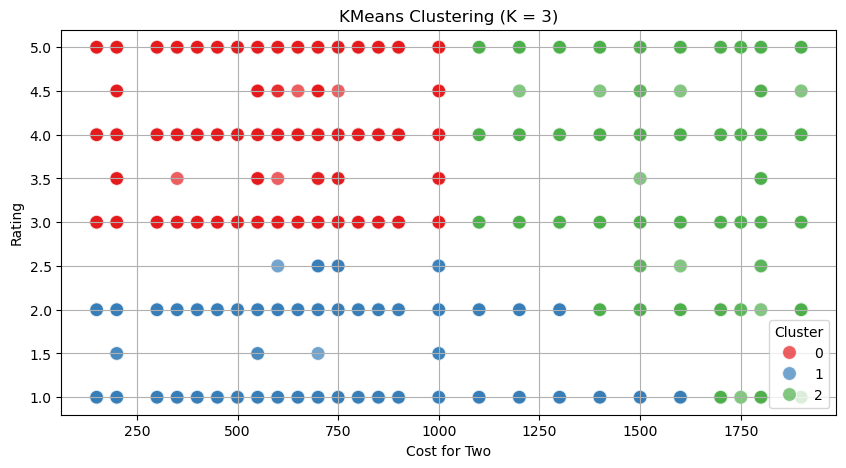

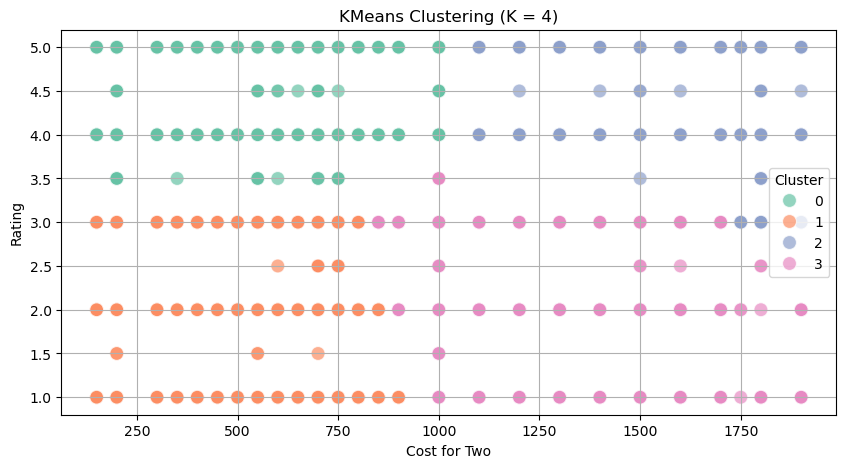

In [120]:
# -----------------------------------------
# 📦 Step 1: Import Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# -----------------------------------------
# 🗂️ Step 2: Prepare Data for Clustering
# -----------------------------------------
# Use only 'cost' and 'rating' columns
df_cluster = merged_df[['cost', 'rating']].dropna()

# Scale the features for better KMeans performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# -----------------------------------------
# 🔍 Step 3: Elbow Method to Choose Optimal K
# -----------------------------------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters (K)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# -----------------------------------------
# 🤖 Step 4: KMeans with K=3
# -----------------------------------------
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster_k3'] = kmeans_3.fit_predict(scaled_features)

# -----------------------------------------
# 🤖 Step 5: KMeans with K=4
# -----------------------------------------
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster_k4'] = kmeans_4.fit_predict(scaled_features)

# -----------------------------------------
# 📊 Step 6: Visualize Clusters for K=3
# -----------------------------------------
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_cluster, x='cost', y='rating', hue='cluster_k3', palette='Set1', s=100, alpha=0.7)
plt.title('KMeans Clustering (K = 3)')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# -----------------------------------------
# 📊 Step 7: Visualize Clusters for K=4
# -----------------------------------------
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_cluster, x='cost', y='rating', hue='cluster_k4', palette='Set2', s=100, alpha=0.7)
plt.title('KMeans Clustering (K = 4)')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [7]:
# ✅ Final Conclusion: Zomato Restaurant & Review Analysis

After conducting thorough data cleaning, univariate, bivariate, and multivariate analysis  along with clustering and sentiment techniques  we can conclude the following:

## 🏁 Key Insights:

1. **Top Cuisines**:  
   The most popular cuisines on Zomato include **North Indian, Chinese, South Indian** and **Fast Food**.

2. **Cost vs Rating**:  
   There is **no strong positive relationship** between restaurant cost and rating  expensive restaurants are **not always better rated**.

3. **Cuisines and Ratings**:  
   Some cuisines like **Italian and North Indian** tend to receive **higher average ratings** than others.

4. **Location Value**:  
   Certain areas provide **better value for money**, meaning high ratings at lower costs. These are ideal spots for new restaurant investment.

5. **Restaurant Types**:  
   Most restaurants are categorized as **Quick Bites** and **Casual Dining**, which dominate the Zomato platform.

6. **Timings**:  
   Majority of restaurants open between **10 AM to 11 PM**, with a lunch and dinner service peak.

7. **Text Sentiment Analysis**:  
   Reviews are **mostly positive** but sentiment scores revealed that **low-rated restaurants often have very short or angry reviews**, which can impact future sales.



## 📊 Final Thought:

By combining **numerical analysis + sentiment analysis + clustering**, we’ve built a full picture of how **ratings, reviews, cost, and cuisine type** influence the success of a restaurant on Zomato. These insights are valuable for **restaurant owners, marketers, and food-tech startups** to make data-driven decisions.



SyntaxError: invalid character '’' (U+2019) (209439918.py, line 32)